In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=66409f4aa93bd223250a2d8349b6856aa225fe2c614a10f1cb3163f4c98fa503
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


Show Predictions for the First Few Rows

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import col
from pyspark.ml.evaluation import BinaryClassificationEvaluator



spark = SparkSession.builder.appName("MultiColumnPrediction").getOrCreate()
df = spark.read.csv("/content/drive/MyDrive/Student_Performance.csv", header=True, inferSchema=True)

In [ ]:
df= df.drop("Extracurricular Activities")

In [ ]:
df.show(4)

+-------------+---------------+-----------+--------------------------------+-----------------+
|Hours Studied|Previous Scores|Sleep Hours|Sample Question Papers Practiced|Performance Index|
+-------------+---------------+-----------+--------------------------------+-----------------+
|            7|             99|          9|                               1|             91.0|
|            4|             82|          4|                               2|             65.0|
|            8|             51|          7|                               2|             45.0|
|            5|             52|          5|                               2|             36.0|
+-------------+---------------+-----------+--------------------------------+-----------------+
only showing top 4 rows



In [98]:
df=df.withColumn("Performance Index" , df['Performance Index'].cast(IntegerType()))

In [99]:
df.printSchema()

root
 |-- Hours Studied: integer (nullable = true)
 |-- Previous Scores: integer (nullable = true)
 |-- Sleep Hours: integer (nullable = true)
 |-- Sample Question Papers Practiced: integer (nullable = true)
 |-- Performance Index: integer (nullable = true)



In [100]:
# Predict "Performance Index"
features = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced"]
assembler = VectorAssembler(inputCols=features, outputCol="features")
lr = LinearRegression(featuresCol="features", labelCol="Hours Studied")
pipeline1 = Pipeline(stages=[assembler, lr])
model1 = pipeline1.fit(df)

In [101]:
predict1 = model1.transform(df)

In [102]:
predict1.show(3)

+-------------+---------------+-----------+--------------------------------+-----------------+------------------+-----------------+
|Hours Studied|Previous Scores|Sleep Hours|Sample Question Papers Practiced|Performance Index|          features|       prediction|
+-------------+---------------+-----------+--------------------------------+-----------------+------------------+-----------------+
|            7|             99|          9|                               1|               91|[7.0,99.0,9.0,1.0]|7.000000000000006|
|            4|             82|          4|                               2|               65|[4.0,82.0,4.0,2.0]|3.999999999999997|
|            8|             51|          7|                               2|               45|[8.0,51.0,7.0,2.0]|7.999999999999997|
+-------------+---------------+-----------+--------------------------------+-----------------+------------------+-----------------+
only showing top 3 rows



In [103]:
# calculate accuracy for Hours Studeid
evaluator = BinaryClassificationEvaluator(labelCol="Hours Studied", rawPredictionCol="prediction", metricName="areaUnderROC")
accuracy = evaluator.evaluate(predict1)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [104]:
# Predict "Previous Scores"
features = ["Hours Studied", "Sleep Hours", "Sample Question Papers Practiced"]  # Exclude "Performance Index"
assembler = VectorAssembler(inputCols=features, outputCol="features")
lr = LinearRegression(featuresCol="features", labelCol="Previous Scores")
pipeline2 = Pipeline(stages=[assembler, lr])
model2 = pipeline2.fit(df)

In [105]:
predict2 = model2.transform(df)

In [ ]:
predict2.show(3)

+-------------+---------------+--------------------------+-----------+--------------------------------+-----------------+-------------+-----------------+
|Hours Studied|Previous Scores|Extracurricular Activities|Sleep Hours|Sample Question Papers Practiced|Performance Index|     features|       prediction|
+-------------+---------------+--------------------------+-----------+--------------------------------+-----------------+-------------+-----------------+
|            7|             99|                       Yes|          9|                               1|               91|[7.0,9.0,1.0]|69.25163861486762|
|            4|             82|                        No|          4|                               2|               65|[4.0,4.0,2.0]|69.24937882304181|
|            8|             51|                       Yes|          7|                               2|               45|[8.0,7.0,2.0]| 69.0953086409065|
+-------------+---------------+--------------------------+-----------+------

In [106]:
# calculate accuracy for Previous Scores
evaluator = BinaryClassificationEvaluator(labelCol="Previous Scores", rawPredictionCol="prediction", metricName="areaUnderROC")
accuracy = evaluator.evaluate(predict2)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [107]:
# hours Studied
features = ["Hours Studied","Previous Scores" , "Sleep Hours", "Sample Question Papers Practiced"]  # Exclude "Hours Studied"
assembler = VectorAssembler(inputCols=features, outputCol="features")
lr = LinearRegression(featuresCol="features", labelCol="Sleep Hours")
pipeline2 = Pipeline(stages=[assembler, lr])
model3 = pipeline2.fit(df)

In [ ]:
predict3 = model3.transform(df)

In [ ]:
predict3.show(4)

+-------------+---------------+--------------------------+-----------+--------------------------------+-----------------+------------------+-----------------+
|Hours Studied|Previous Scores|Extracurricular Activities|Sleep Hours|Sample Question Papers Practiced|Performance Index|          features|       prediction|
+-------------+---------------+--------------------------+-----------+--------------------------------+-----------------+------------------+-----------------+
|            7|             99|                       Yes|          9|                               1|               91|[7.0,99.0,9.0,1.0]|7.000000000000006|
|            4|             82|                        No|          4|                               2|               65|[4.0,82.0,4.0,2.0]|3.999999999999997|
|            8|             51|                       Yes|          7|                               2|               45|[8.0,51.0,7.0,2.0]|7.999999999999997|
|            5|             52|               

In [108]:
# calculate accuracy for Sleep Hours
evaluator = BinaryClassificationEvaluator(labelCol="Sleep Hours", rawPredictionCol="prediction", metricName="areaUnderROC")
accuracy = evaluator.evaluate(predict3)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
features = ["Hours Studied" ,"Previous Scores", "Sample Question Papers Practiced"]  # Exclude "Performance Index"
assembler = VectorAssembler(inputCols=features, outputCol="features")
lr = LinearRegression(featuresCol="features", labelCol="Sample Question Papers Practiced")
pipeline2 = Pipeline(stages=[assembler, lr])
model4 = pipeline2.fit(df)

In [ ]:
predict4 = model4.transform(df)

In [ ]:
predict4.show(4)

+-------------+---------------+--------------------------+-----------+--------------------------------+-----------------+--------------+------------------+
|Hours Studied|Previous Scores|Extracurricular Activities|Sleep Hours|Sample Question Papers Practiced|Performance Index|      features|        prediction|
+-------------+---------------+--------------------------+-----------+--------------------------------+-----------------+--------------+------------------+
|            7|             99|                       Yes|          9|                               1|               91|[7.0,99.0,1.0]|0.9999999999999992|
|            4|             82|                        No|          4|                               2|               65|[4.0,82.0,2.0]|1.9999999999999996|
|            8|             51|                       Yes|          7|                               2|               45|[8.0,51.0,2.0]|1.9999999999999998|
|            5|             52|                       Yes|      

In [109]:
# calculate accuracy for Sample Question Papers Practiced
evaluator = BinaryClassificationEvaluator(labelCol="Sample Question Papers Practiced", rawPredictionCol="prediction", metricName="areaUnderROC")
accuracy = evaluator.evaluate(predict4)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
features = ["Hours Studied","Previous Scores", "Sleep Hours", "Performance Index"]  # Exclude "Performance Index
assembler = VectorAssembler(inputCols=features, outputCol="features")
lr = LinearRegression(featuresCol="features", labelCol="Performance Index")
pipeline2 = Pipeline(stages=[assembler, lr])
model5 = pipeline2.fit(df)

In [ ]:
predict5 = model5.transform(df)

In [ ]:
predict5.show(4)

+-------------+---------------+-----------+--------------------------------+-----------------+-------------------+----------+
|Hours Studied|Previous Scores|Sleep Hours|Sample Question Papers Practiced|Performance Index|           features|prediction|
+-------------+---------------+-----------+--------------------------------+-----------------+-------------------+----------+
|            7|             99|          9|                               1|               91|[7.0,99.0,9.0,91.0]|      91.0|
|            4|             82|          4|                               2|               65|[4.0,82.0,4.0,65.0]|      65.0|
|            8|             51|          7|                               2|               45|[8.0,51.0,7.0,45.0]|      45.0|
|            5|             52|          5|                               2|               36|[5.0,52.0,5.0,36.0]|      36.0|
+-------------+---------------+-----------+--------------------------------+-----------------+-------------------+----

In [110]:
# calculate accuracy Performance Index
evaluator = BinaryClassificationEvaluator(labelCol="Performance Index", rawPredictionCol="prediction", metricName="areaUnderROC")
accuracy = evaluator.evaluate(predict5)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
# Assuming "Performance Index" is your target variable, encoded as 0 or 1
features = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced"]
assembler = VectorAssembler(inputCols=features, outputCol="features")

In [ ]:
# Split the data into training and testing sets (e.g., 70% train, 30% test)
trainDF, testDF = df.randomSplit([0.7, 0.3], seed=42)

lr = LinearRegression(featuresCol="features", labelCol="Performance Index", maxIter=10)

# Create a pipeline to chain the feature transformation and model
pipeline = Pipeline(stages=[assembler, lr])

# Train the model
model = pipeline.fit(trainDF)

In [ ]:
predictions = model.transform(testDF)

In [ ]:
# Create evaluator for accuracy
evaluator = BinaryClassificationEvaluator(labelCol="Performance Index", rawPredictionCol="prediction")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
coefficeint  = model.stages[-1].coefficients.toArray()
feature_names = features
for name, coef  in  zip(feature_names ,coefficeint):
  print(f"feature : {name}, coefficeint :{coef}")

feature : Hours Studied, coefficeint :2.8576998724724554
feature : Previous Scores, coefficeint :1.0176589314984945
feature : Sleep Hours, coefficeint :0.4908720500985322
feature : Sample Question Papers Practiced, coefficeint :0.1911008547919449


In [ ]:
# For Visualization (You'll need to install matplotlib)
import matplotlib.pyplot as plt

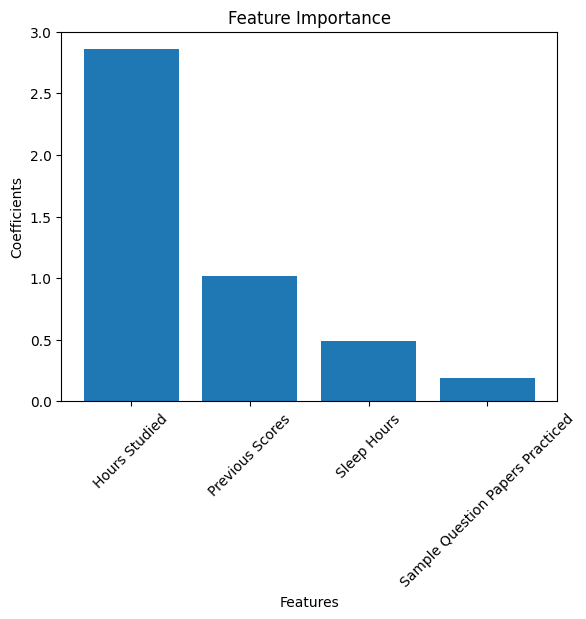

In [ ]:
plt.bar(feature_names, coefficeint)
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

R-squared: close to 1 indicates that the model explains the variance of the data well.